# Прогнозирование оттока клиентов из банка

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Первичное-изучение-данных" data-toc-modified-id="Первичное-изучение-данных-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Первичное изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Распределение-целевого-признака" data-toc-modified-id="Распределение-целевого-признака-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Распределение целевого признака</a></span></li><li><span><a href="#Обучение-базовой-модели-на-несбалансированных-данных" data-toc-modified-id="Обучение-базовой-модели-на-несбалансированных-данных-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Обучение базовой модели на несбалансированных данных</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Параметр-class_weight-для-борьбы-с-дисбалансом" data-toc-modified-id="Параметр-class_weight-для-борьбы-с-дисбалансом-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Параметр class_weight для борьбы с дисбалансом</a></span></li><li><span><a href="#Увеличение-выборки-для-борьбы-с-дисбалансом" data-toc-modified-id="Увеличение-выборки-для-борьбы-с-дисбалансом-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Увеличение выборки для борьбы с дисбалансом</a></span></li><li><span><a href="#Уменьшение-выборки-для-борьбы-с-дисбалансом" data-toc-modified-id="Уменьшение-выборки-для-борьбы-с-дисбалансом-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Уменьшение выборки для борьбы с дисбалансом</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li><li><span><a href="#Поверка-модели-на-адекватность" data-toc-modified-id="Поверка-модели-на-адекватность-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Поверка модели на адекватность</a></span></li></ul></li></ul></li></ul></div>

# Отток клиентов

**Цель проекта:** Спрогнозировать, уйдёт клиент из банка в ближайшее время или нет, на основе исторических данные о поведении клиентов и расторжении договоров с банком.

Необходимо построить модель с предельно большим значением *F1*-меры и довести метрику до 0.59. Дополнительно измерять *AUC-ROC*, сравнивать её значение с *F1*-мерой.

**Описание данных**  
Согласно документации к данным:
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.  

Признаки  
`RowNumber` — индекс строки в данных  
`CustomerId` — уникальный идентификатор клиента  
`Surname` — фамилия  
`CreditScore` — кредитный рейтинг  
`Geography` — страна проживания  
`Gender` — пол  
`Age` — возраст  
`Tenure` — количество недвижимости у клиента  
`Balance` — баланс на счёте  
`NumOfProducts` — количество продуктов банка, используемых клиентом  
`HasCrCard` — наличие кредитной карты  
`IsActiveMember` — активность клиента  
`EstimatedSalary` — предполагаемая зарплата  

Целевой признак  
`Exited` — факт ухода клиента


## Подготовка данных

#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score, roc_curve, precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle

In [2]:
# сбросим ограничение на количество выводимых столбцов, чтобы просмотреть все столбцы
pd.set_option('display.max_columns', None)
# уберем экспонентациальные формы при выводе данных
pd.set_option("display.float_format", "{:.2f}".format)

#### Первичное изучение данных

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

In [4]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.00,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.00,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.00,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.00,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.00,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.00,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.00,134603.88,1,1,1,71725.73,0


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**ВЫВОДЫ:**  

1. В столбце Tenure есть пропущенные значения
2. Считаем, что данные в стобцах RowNumber, CustomerId, Surname не информативны для цели исследования и не могут влиять на его решение об уходе из банка 

#### Предобработка данных

In [6]:
# Удалим столбцы Surname, CustomerId, RowNumber как неинформативные
data.drop(columns=['CustomerId','Surname','RowNumber'], axis=1, inplace=True)

In [7]:
# Прведем названия столбцов к привычному виду и нижнему регистру
data.columns = data.columns.str.lower()

data.rename(columns = {'numofproducts': 'num_of_products', 'hascrcard': 'has_cr_card', 
          'isactivemember': 'is_active_member', 'estimatedsalary': 'estimated_salary'}, inplace = True)

In [8]:
# Посмотрим значения по столбцу Geography
data['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [9]:
# Посмотрим значения по столбцу Gender
data['gender'].value_counts() 

Male      5457
Female    4543
Name: gender, dtype: int64

Столбец tenure содержит около 10% пропусков. Посмотрим подробнее на данные:

In [10]:
data['tenure'].describe()

count   9091.00
mean       5.00
std        2.89
min        0.00
25%        2.00
50%        5.00
75%        7.00
max       10.00
Name: tenure, dtype: float64

In [11]:
data['tenure'].value_counts()

1.00     952
2.00     950
8.00     933
3.00     928
5.00     927
7.00     925
4.00     885
9.00     882
6.00     881
10.00    446
0.00     382
Name: tenure, dtype: int64

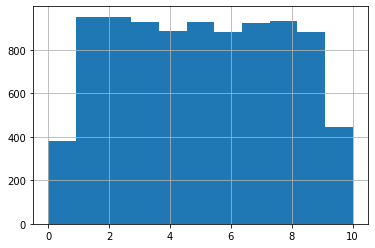

In [12]:
# Посмотрим на распределение данных
data['tenure'].hist(bins=11)
plt.show()

Природа пропусков нам не известна - вероятнее всего, человеческий фактор. Заполнив значения нулями, мы увеличим данные о недавно (менее года назад) пришедших клиентах, что не соответствует действительности. Заполним отсутствующие значения случайными числами. Если результаты нас не устроят, удалим пропуски.

In [51]:
data['tenure'] = data['tenure'].apply(lambda l: l if not np.isnan(l) else np.random.randint(0, 10))

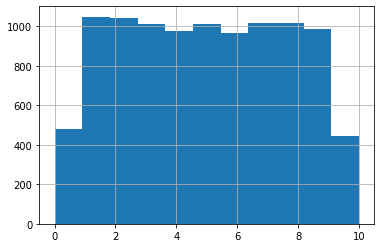

In [52]:
# Посмотрим, как изменилось распределение
data['tenure'].hist(bins=11)
plt.show()

In [16]:
# Проверим, что не осталось пропуков
data.isna().sum()

creditscore         0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

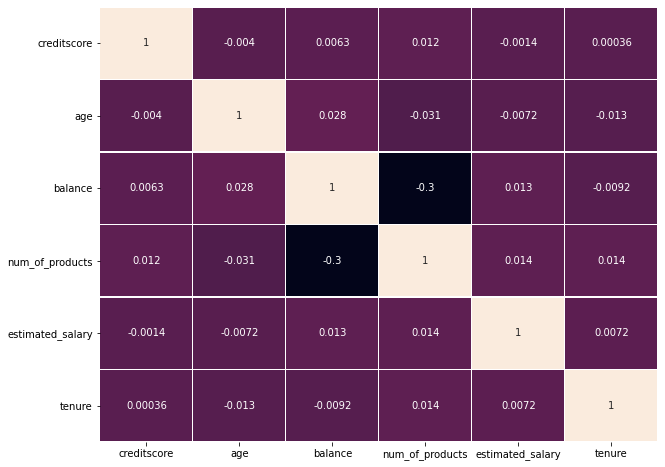

In [17]:
# рассчитаем коэффициенты корреляции 
plt.figure(figsize=(10, 8)) 
sns.heatmap(data[['creditscore','age','balance','num_of_products','estimated_salary','tenure']].corr(),
            annot=True, cbar=False, robust=True, linewidths=.2) 
plt.show() 

Корреляции между числовыми столбцами не обнаружено, самое больше значение |0,3| между количеством продуктов и балансом на счете.

In [18]:
# Применим технику прямого кодирования ОНЕ к датафрейму, избежав "ловушку фиктивных признаков"
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe

,creditscore,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.00,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.00,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.00,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.00,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.00,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.00,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.00,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.00,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.00,75075.31,2,1,0,92888.52,1,1,0,1


1. Определим random_state = 12345 для выполнения всех этапов проекта
2. Исходные данные разделим на обучающую, валидационную и тестовую выборки в соотношении 3:1:1  
Обучающая выборка (train) - 60%  
Валидационная выборка (valid) - 20%  
Тестовая выборка (test) - 20%

In [19]:
# выделяем учебную и целевую части
features = data_ohe.drop(['exited'], axis=1)
target = data_ohe['exited']

In [20]:
# разделяем выборку на обучающую и тестовую, объединив в тестовой части 40% данных
features_train, features_test, target_train, target_test = train_test_split\
(features, target, test_size=0.4, random_state=12345, stratify=target) 

In [21]:
# разделим тестовую и валидационную выборки (получаем по 20% от исходных данных)
features_test, features_valid, target_test, target_valid = train_test_split\
(features_test, target_test, test_size=0.5, random_state=12345, stratify=target_test)

In [22]:
# выведем на экран размеры полученных выборок.
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)
print(features_valid.shape)
print(target_valid.shape) 

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


In [23]:
# создадим переменную numeric, список всех численных признаков
numeric = ['creditscore','age','tenure','balance','num_of_products','estimated_salary'] 

In [24]:
# Нормируем числовые данные, используя StandardScaler
scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# посмотрим, что получилось, на тренировочной выборке 
features_train

,creditscore,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
2837,-1.04,0.95,0.36,0.77,-0.91,0,1,-0.12,1,0,0
9925,0.45,-0.10,0.02,1.91,-0.91,1,1,-0.26,0,0,0
8746,0.10,-0.48,1.05,0.48,0.82,0,1,1.42,0,0,1
660,-0.18,0.19,0.36,0.09,-0.91,1,1,-1.16,1,0,0
3610,-0.72,1.62,-1.36,0.88,-0.91,1,0,0.11,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6172,-0.84,0.38,0.02,0.18,4.29,1,1,0.12,1,0,1
2360,-1.36,0.19,0.02,0.55,-0.91,1,0,-0.19,1,0,0
4499,-1.17,0.48,-0.33,0.73,-0.91,0,0,0.53,1,0,0
9162,0.16,2.29,-0.67,0.45,-0.91,1,1,-1.31,1,0,1


**ВЫВОДЫ**.  
Данные подготовлены для дальнейшего исследования:
1. Данные изучены, выполнена необходимая предобработка
2. Датасет разделен на тренировочную, валидацинную и тестовую выборки в соотношении 3:1:1  
3. Числовые признаки приведены к единому масштабу
4. Посредством One-Hot Encoding категориальные признаки преобразованы в числовые

## Исследование задачи

#### Распределение целевого признака

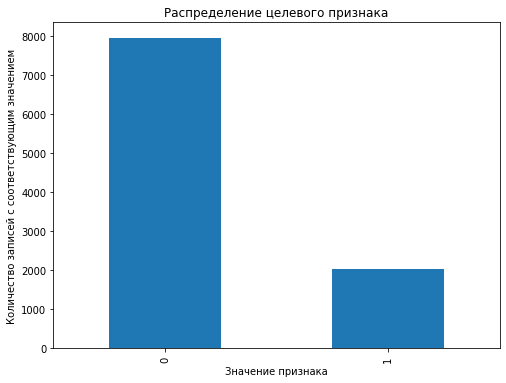

In [25]:
# посмотрим на рапределение целевого признака
fig, ax = plt.subplots(1)
ax.set_title('Распределение целевого признака')
ax.set_xlabel('Значение признака')
ax.set_ylabel('Количество записей с соответствующим значением')
target.value_counts().plot(kind='bar', figsize=(8,6), ax=ax)
plt.show()

In [26]:
features[target == 0].shape, features[target == 1].shape

((7963, 11), (2037, 11))

Наблюдаем дисбаланс данных, объектов отрицательного класса почти в 4 раза больше, чем положительного. 

#### Обучение базовой модели на несбалансированных данных


**Логистическая регрессия**

In [27]:
# Используем гиперпараметр solver='lbfgs' 

model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, predicted_valid) 

print("F1:", f1)
print("ROC_auc:", roc_auc)

F1: 0.2932330827067669
ROC_auc: 0.5810710556473269


**Дерево решений**

In [28]:
# зададим глубину дерева в диапазоне от 1 до 30
f1 = 0
depth = 1

for i in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=i) 
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid) > f1:
            f1 = f1_score(target_valid, predicted_valid)
            depth = i
    roc_auc_dtc = roc_auc_score(target_valid, predicted_valid)  

print("Глубина дерева:", depth)
print("F1:", f1)
print("ROC_auc:", roc_auc) 

Глубина дерева: 7
F1: 0.552437223042836
ROC_auc: 0.5810710556473269


**Случайный лес**

In [29]:
# зададим количество деревьев в диапазоне до 100
f1 = 0
n_estimators = 0
best_predict = 0

for i in range (1, 101, 5):
    for j in range(1, 30, 5):
        model = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=12345)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        if f1_score(target_valid, predicted_valid) > f1:
            f1 = f1_score(target_valid, predicted_valid)
            n_estimators = i
            max_depth = j
            best_predict = predicted_valid
    auc_roc = roc_auc_score(target_valid, best_predict)

print("Число деревьев:", n_estimators)
print("максимальная глубина:", max_depth)
print("F1:", f1)
print("ROC_auc:", auc_roc)

Число деревьев: 11
максимальная глубина: 16
F1: 0.5555555555555556
ROC_auc: 0.7040461108257718


**ВЫВОДЫ:**

Результаты обученных на несбалансированных данных моделей:  
1. Модель логистической регрессии: F1 и Roc_auc соответственно 0,29 и 0,58.  
2. Модель дерева решений: F1 и Roc_auc соответственно 0,55 и 0,59.
3. Модель случайного леса: F1 и Roc_auc соответственно 0,56 и 0,70.  
Таким образом, лучший результат без борьбы с дисбалансом показала модель случайного леса

## Борьба с дисбалансом

#### Параметр class_weight для борьбы с дисбалансом

**Логистическая регрессия**

In [30]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000, class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, predicted_valid) 

print("F1:", f1)
print("ROC_auc:", roc_auc)

F1: 0.4751958224543081
ROC_auc: 0.6881743068183748


**Дерево решений**

In [31]:
f1 = 0
depth = 1

for i in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=i, class_weight = 'balanced') 
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid) > f1:
            f1 = f1_score(target_valid, predicted_valid)
            depth = i
    roc_auc_dtc = roc_auc_score(target_valid, predicted_valid)  

print("Глубина дерева:", depth)
print("F1:", f1)
print("ROC_auc:", roc_auc)

Глубина дерева: 4
F1: 0.5403949730700179
ROC_auc: 0.6881743068183748


**Случайный лес**

In [32]:
f1 = 0
n_estimators = 0
best_predict = 0

for i in range (1, 101, 5):
    for j in range(1, 30, 5):
        model = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=12345, class_weight = 'balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        if f1_score(target_valid, predicted_valid) > f1:
            f1 = f1_score(target_valid, predicted_valid)
            n_estimators = i
            max_depth = j
            best_predict = predicted_valid
    auc_roc = roc_auc_score(target_valid, best_predict)

print("Число деревьев:", n_estimators)
print("максимальная глубина:", max_depth)
print("F1:", f1)
print("ROC_auc:", auc_roc)

Число деревьев: 76
максимальная глубина: 6
F1: 0.5987525987525987
ROC_auc: 0.7700042106821768


**ВЫВОДЫ**

После применения параметра class_weight результаты моделей логистической регресси и случайного леса улучшились, а результаты модели дерева решений ухудшились в пределах 1%.  
Модель логистической регрессии: F1 и Roc_auc соответственно 0,48 и 0,69.  
Модель дерева решений: F1 и Roc_auc соответственно 0,55 и 0,58.  
Модель случайного леса: F1 и Roc_auc соответственно 0,60 и 0,77. 

#### Увеличение выборки для борьбы с дисбалансом

In [33]:
# Создадим функцию, которая принимает на вход: признаки, целевой признак, количество повторений
# функция вернёт признаки и целевой признак после операции upsampling

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape, target_upsampled.shape) 

(9666, 11) (9666,)


In [34]:
# Обучим на новых данных модель LogisticRegression
model = LogisticRegression(random_state=12345, solver='liblinear') 
model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, predicted_valid)

print("F1:", f1)
print("ROC_auc:", roc_auc)

F1: 0.47822374039282667
ROC_auc: 0.6920657174894462


In [35]:
# Обучим на новых данных модель дерева решений
f1 = 0
depth = 1

for i in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=i) 
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid) > f1:
            f1 = f1_score(target_valid, predicted_valid)
            depth = i
    roc_auc_dtc = roc_auc_score(target_valid, predicted_valid)  

print("Глубина дерева:", depth)
print("F1:", f1)
print("ROC_auc:", roc_auc)

Глубина дерева: 4
F1: 0.5403949730700179
ROC_auc: 0.6920657174894462


In [36]:
# Обучим на новых данных модель случайного леса
f1 = 0
n_estimators = 0
best_predict = 0

for i in range (1, 101, 5):
    for j in range(1, 30, 5):
        model = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        if f1_score(target_valid, predicted_valid) > f1:
            f1 = f1_score(target_valid, predicted_valid)
            n_estimators = i
            max_depth = j
            best_predict = predicted_valid
    auc_roc = roc_auc_score(target_valid, best_predict)

print("Число деревьев:", n_estimators)
print("максимальная глубина:", max_depth)
print("F1:", f1)
print("ROC_auc:", auc_roc)

Число деревьев: 91
максимальная глубина: 11
F1: 0.6039488966318235
ROC_auc: 0.7585189195358687


**ВЫВОДЫ**

После увеличения выборки результаты модели показали следующие результаты:  
Модель логистической регрессии: F1 и Roc_auc соответственно 0,48 и 0,69. Результат не изменился.  
Модель дерева решений: F1 и Roc_auc соответственно 0,55 и 0,68. Результат почти не изменился.  
Модель случайного леса: F1 и Roc_auc соответственно 0,60 и 0,76. Результат почти не изменился.

#### Уменьшение выборки для борьбы с дисбалансом

In [37]:
# Создадим функцию,которая принимает на вход: признаки, целевой признак, количество повторений
# функция вернёт признаки и целевой признак после операции downsampling

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2416, 11)
(2416,)


In [38]:
# Обучим на новых данных модель LogisticRegression

model = LogisticRegression(random_state=12345, solver='liblinear') 
model.fit(features_downsampled, target_downsampled)

predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, predicted_valid)

print("F1:", f1)
print("ROC_auc:", roc_auc)

F1: 0.47733105218135163
ROC_auc: 0.6911510894561741


In [39]:
# Обучим на новых данных модель дерева решений
f1 = 0
depth = 1

for i in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=i) 
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid) > f1:
            f1 = f1_score(target_valid, predicted_valid)
            depth = i
    roc_auc_dtc = roc_auc_score(target_valid, predicted_valid)  

print("Глубина дерева:", depth)
print("F1:", f1)
print("ROC_auc:", roc_auc)

Глубина дерева: 6
F1: 0.5590778097982709
ROC_auc: 0.6911510894561741


In [40]:
# Обучим на новых данных модель случайного леса

f1 = 0
n_estimators = 0
best_predict = 0

for i in range (1, 101, 5):
    for j in range(1, 30, 5):
        model = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=12345)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        if f1_score(target_valid, predicted_valid) > f1:
            f1 = f1_score(target_valid, predicted_valid)
            n_estimators = i
            max_depth = j
            best_predict = predicted_valid
    auc_roc = roc_auc_score(target_valid, best_predict)

print("Число деревьев:", n_estimators)
print("максимальная глубина:", max_depth)
print("F1:", f1)
print("ROC_auc:", auc_roc)

Число деревьев: 56
максимальная глубина: 11
F1: 0.590566037735849
ROC_auc: 0.7778039981429812


**ВЫВОДЫ**

После уменьшения выборки модели показали следующие результаты:  
Модель логистической регрессии: F1 и Roc_auc соответственно 0,47 и 0,69. Результат практически не изменился.  
Модель дерева решений: F1 и Roc_auc соответственно 0,56 и 0,69. Результат практически не изменился.  
Модель случайного леса: F1 и Roc_auc соответственно 0,59 и 0,78. Результат практически не изменился.

**ОБЩИЙ ВЫВОД ПО УСТРАНЕНИЮ ДИСБАЛАНСА**  

Мы использовали разные подходы для решения проблемы дисбаланса и получили следующие результаты:

Показатели модели логистической регресси значительно улучшились в результате использования параметра class weight. Значение F1 увеличилось c 0,29 до 0,48. Roc_auc с 0,58 до 0,69. Последующие экспериметы с увеличением и уменьшением выборки привели к изменениям значений в пределах 0,1%.  

Показатели модели дерева решений в ходе исследований изменялись в пределах 0,5%. Полученное значение F1 0,55, Roc_auc 0,69.  

В результате борьбы с дисбалансом лучшие результаты показала модель случайного леса. Лучшие показатели  F1 и Roc_auc соответственно 0,62
и 0,77 получены при параметрах число деревьев 91 и максимальной глубине 11. Эту модель мы будем исследовать далее на тестовой выборке.

## Тестирование модели

#### Проверка на тестовой выборке

In [46]:
model = RandomForestClassifier(n_estimators=91, max_depth=11, random_state=12345)
        
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

f1 = f1_score(target_test, predictions_test)
auc_roc = roc_auc_score(target_test, predictions_test)

print("F1:", f1)
print("ROC_auc:", auc_roc) 

F1: 0.5950920245398773
ROC_auc: 0.722041580451276


Проверка модели на тестовой выборке показала результаты F1 0,60 и Roc_auc 0,73  что на 1% и 5% меньше результата обученной модели

#### Поверка модели на адекватность

In [47]:
dummy_model = DummyClassifier(strategy='most_frequent', random_state=12345)
dummy_model.fit(features_train, target_train)
prediction = dummy_model.predict(features_test)

print(f1_score(target_test, prediction))

0.0


In [48]:
dummy_model = DummyClassifier(strategy='stratified', random_state=12345)
dummy_model.fit(features_train, target_train)
prediction = dummy_model.predict(features_test)

print(f1_score(target_test, prediction))

0.23300970873786409


In [49]:
dummy_model = DummyClassifier(strategy='uniform', random_state=12345)
dummy_model.fit(features_train, target_train)
prediction = dummy_model.predict(features_test)

print(f1_score(target_test, prediction))

0.29880197322057794


In [50]:
model = RandomForestClassifier(n_estimators=91, max_depth=11, random_state=12345)
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0, 0.8, 0.02):
    predicted_test = probabilities_one_test > threshold 
    precision = precision_score(target_test, predicted_test) 
    recall = recall_score(target_test, predicted_test) 
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, ROC_auc = {:.3f}"\
      .format(
        threshold, precision, recall,\
        f1_score(target_test, predicted_test), roc_auc_score(target_test, predicted_test))) 

Порог = 0.00 | Точность = 0.204, Полнота = 1.000, F1 = 0.339, ROC_auc = 0.500
Порог = 0.02 | Точность = 0.216, Полнота = 0.993, F1 = 0.355, ROC_auc = 0.536
Порог = 0.04 | Точность = 0.245, Полнота = 0.980, F1 = 0.392, ROC_auc = 0.603
Порог = 0.06 | Точность = 0.271, Полнота = 0.953, F1 = 0.422, ROC_auc = 0.648
Порог = 0.08 | Точность = 0.300, Полнота = 0.931, F1 = 0.453, ROC_auc = 0.687
Порог = 0.10 | Точность = 0.335, Полнота = 0.914, F1 = 0.490, ROC_auc = 0.724
Порог = 0.12 | Точность = 0.370, Полнота = 0.892, F1 = 0.523, ROC_auc = 0.751
Порог = 0.14 | Точность = 0.404, Полнота = 0.870, F1 = 0.552, ROC_auc = 0.771
Порог = 0.16 | Точность = 0.445, Полнота = 0.838, F1 = 0.581, ROC_auc = 0.785
Порог = 0.18 | Точность = 0.478, Полнота = 0.819, F1 = 0.603, ROC_auc = 0.795
Порог = 0.20 | Точность = 0.495, Полнота = 0.789, F1 = 0.608, ROC_auc = 0.791
Порог = 0.22 | Точность = 0.523, Полнота = 0.777, F1 = 0.625, ROC_auc = 0.798
Порог = 0.24 | Точность = 0.556, Полнота = 0.752, F1 = 0.640, RO

**ОБЩИЙ ВЫВОД**. 
1. Мы исследовали данные, отбросили лишние признаки и заполнили пропуски
2. Также были обработаны категориальные признаки и стандартизированы числовые
3. При исследованиях различных моделей мы столкнулись с проблемой дисбаланса, которая не позволила нам добиться необходимого результата агрегирующей метрики среднего гармонического, объединяющего полноту и точность.
4. Для решения проблемы мы попробовали
    - Выровнять вес классов
    - Добавить данных положительного класса
    - Убрать данные отрицательного класса
5. На основании нашего исследования мы выбрали и обучили лучшую модель. Лучшие показатели у модели случайного леса с количеством деревьев 16 и глубиной 11 при сбалансированном взвешивании классов.
6. Нам удалось достичь необходимой F1-меры, она составила 0.6125290023201856.  
Таким образм, для проноза ухода клиента мы рекомендуем использовать модель случайного леса с количеством деревьев 16 и глубиной 11 при сбалансированном взвешивании классов.
